# NYC's AirBnb

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load and Clean AriBnb Data

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from geopandas import GeoDataFrame
import seaborn as sns
import requests
import json
from IPython.display import IFrame

sns.set()

In [3]:
listing_data = "Airbnb_Data/Detailed/listings.csv"
listings_df = pd.read_csv(listing_data)
listings_df.shape

(48233, 106)

In [4]:
listings_df.rename(columns = {'neighbourhood_group_cleansed': 'borough'}, inplace = True)
listings_df['price'] = listings_df['price'].str.replace('$', '').str.replace(',', '').astype(float)

organized_df = listings_df[["id", "host_is_superhost", "borough", "zipcode", \
                            "latitude", "longitude", "is_location_exact", "room_type", "accommodates", \
                            "bathrooms", "bedrooms", "beds", "bed_type", "price","number_of_reviews", \
                            "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin", \
                            "review_scores_communication", "review_scores_location", "review_scores_value", \
                            "cancellation_policy"]]
#organized_df = organized_df.dropna()
#organized_df.head()

## I. Geolocation of AriBnb

In [5]:
geo = organized_df.loc[organized_df["is_location_exact"]=="t", ["borough", "zipcode", "latitude", "longitude", "room_type", "price"]]

### geolocation of listings in NYC

In [6]:
mapbox_access_token = 'pk.eyJ1IjoiZ2oyMjk3IiwiYSI6ImNqd2xtaGdoZjA5bTEzeW56ZmM1aDVkaWEifQ.OQ8oKbUco3xfLHxipz0fJA'

data1 = [
    go.Scattermapbox(
        lat=geo["latitude"],
        lon=geo["longitude"],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=1.3
        ),
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.7128,
            lon=-74.0060
        ),
        pitch=0,
        zoom=10
    ),
    width=750, 
    height=750
)

fig = go.Figure(data=data1, layout=layout)
#py.iplot(fig, filename='AirBnb in NYC')

IFrame('https://plot.ly/~gj2297/4', width=750, height=750)

## II. Number of AirBnb in NYC and each Borough

### Total Number of AirBnb in NYC

In [7]:
total_AirBnb = len(organized_df)
print(f"The total listings in NYC is {total_AirBnb}.")

The total listings in NYC is 48233.


### Number of AirBnb in each Borough

In [8]:
num_by_borough = pd.DataFrame(organized_df["borough"].value_counts())
num_by_borough.rename(columns={"borough": "Number of Listings"})

,Number of Listings
Manhattan,21513
Brooklyn,19809
Queens,5521
Bronx,1038
Staten Island,352


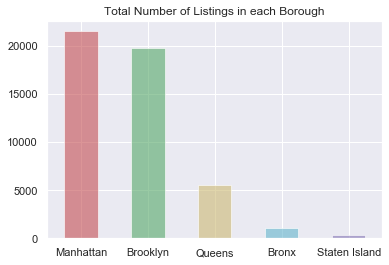

In [9]:
# bar chart: total number of AirBnb in each borough
num_by_borough.plot.bar(color = "rgycm", alpha = 0.6)
plt.xticks(rotation = 0)
plt.legend().remove()
plt.title("Total Number of Listings in each Borough")
plt.savefig("Images/Total Number of Listings in each Borough.png")
plt.show()

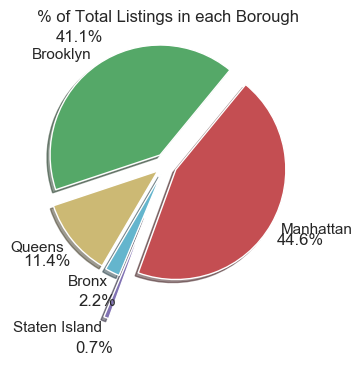

In [10]:
# pie chart: % of total AirBnb in each borough
labels = num_by_borough.index
sizes = num_by_borough["borough"]
explode = (0.1, 0.1, 0.1, 0.1, 0.5)
figure(num=None, figsize=(4, 4), dpi=100, facecolor='w', edgecolor='k')
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=250, colors="rgycm", \
       pctdistance=1.3, labeldistance=1.1)
plt.axis('equal')
plt.title("% of Total Listings in each Borough")
plt.savefig("Images/% of Total Listings in each Borough.png")
plt.show()

### Number of Listings by Zipcode

In [11]:
#read in shape file
zip_codes = GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp')
zip_codes = zip_codes.rename(columns={"ZIPCODE": "zipcode"})
#zip_codes.head()

In [12]:
#converting zipcode column to string data type
organized_df['zipcode'] = organized_df['zipcode'].astype(int)
#returns only zip codes that are > or = to 10000
organized_df = organized_df[organized_df["zipcode"]>=10000]
organized_df['zipcode'] = organized_df['zipcode'].astype(str)
num_by_zipcode = organized_df["zipcode"].value_counts()
num_by_zipcode = pd.DataFrame({"zipcode": num_by_zipcode.index, "count": num_by_zipcode.values})
#num_by_zipcode.head()

In [13]:
zip_count = GeoDataFrame(pd.merge(num_by_zipcode, zip_codes, how='left', on='zipcode'))
zip_count = zip_count.dropna()
#zip_count.head()

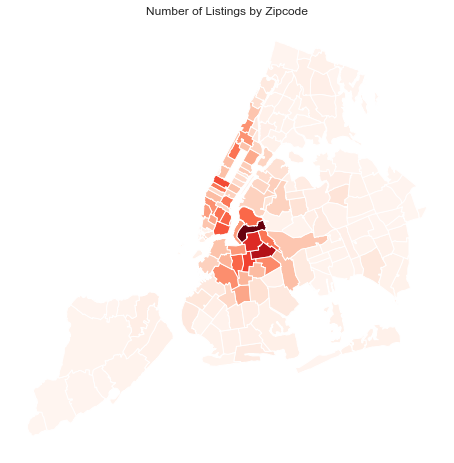

In [14]:
#Plotting the data
fig, ax = plt.subplots(figsize = (8,8))
zip_count.plot(column='count', cmap='Reds', alpha=1, ax=ax)
plt.title('Number of Listings by Zipcode')
plt.axis('off')
plt.savefig("Images/Number of Listings by Zipcode.png")
plt.show()

## III. Avg Price in NYC and each Borough

### Avg Price in NYC

In [15]:
#Average Price NYC
avg_price = round(organized_df["price"].mean(), 2)
#sd_price = round(np.std(organized_df["price"]), 2)
print(f"The average AirBnb price in NYC is: ${avg_price}.")
#print(f"The standard deviation of AirBnb price in NYC is: ${sd_price}.")

The average AirBnb price in NYC is: $152.87.


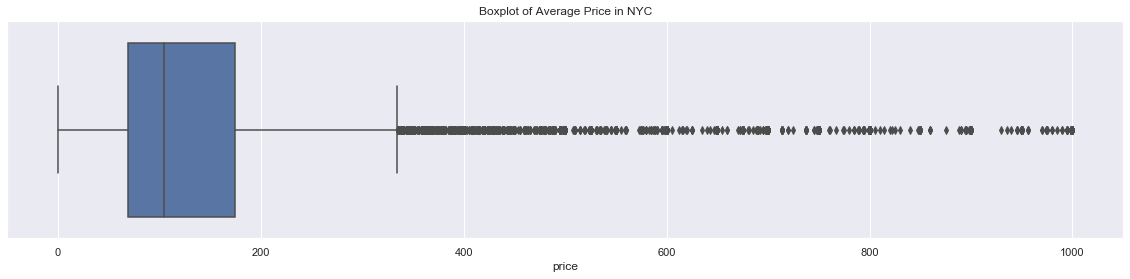

In [16]:
fig, ax = plt.subplots(figsize=(20,4))
price_data = organized_df.loc[organized_df["price"]<=1000]["price"]
ax = sns.boxplot(x=price_data)
plt.title("Boxplot of Average Price in NYC")
plt.savefig("Images/Boxplot of Average Price in NYC")
plt.show()

### Avg Price in each Borough

In [17]:
# Average Price in each borough
average_price = round(organized_df.groupby("borough")["price"].mean(), 2)
average_price = pd.DataFrame(average_price)
average_price = average_price.reindex(["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"])
average_price

,price
borough,
Manhattan,197.00
Brooklyn,124.28
Queens,98.37
Bronx,86.27
Staten Island,115.68


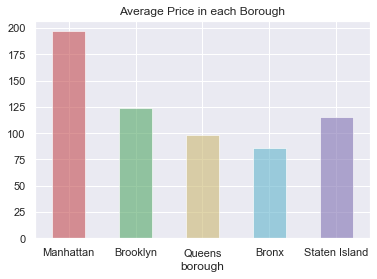

In [18]:
average_price.plot.bar(color = "rgycm", alpha = 0.6)
plt.xticks(rotation = 0)
plt.legend().remove()
plt.title("Average Price in each Borough")
plt.savefig("Images/Average Price in each Borough.png")
plt.show()

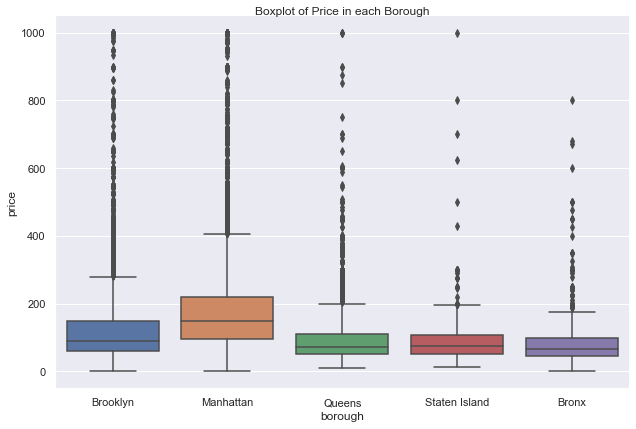

In [19]:
borough_price = organized_df.loc[organized_df["price"]<=1000][["borough", "price"]]
sns.catplot(kind='box', y="price", x="borough", data=borough_price, height = 6, aspect = 1.5, legend_out=False)
plt.title("Boxplot of Price in each Borough", pad = 1)
plt.savefig("Images/Boxplot Price in each Borough.png")
plt.show()

### Avg Price by Zipcode

In [20]:
avg_price_zipcode = round(organized_df.groupby("zipcode")["price"].mean(), 2)
avg_price_zipcode = pd.DataFrame({"zipcode": avg_price_zipcode.index, "avg price": avg_price_zipcode.values})
zip_price = GeoDataFrame(pd.merge(avg_price_zipcode, zip_codes, how='left', on='zipcode'))
zip_price = zip_price.dropna()
#zip_price.sort_values("avg price", ascending=False)

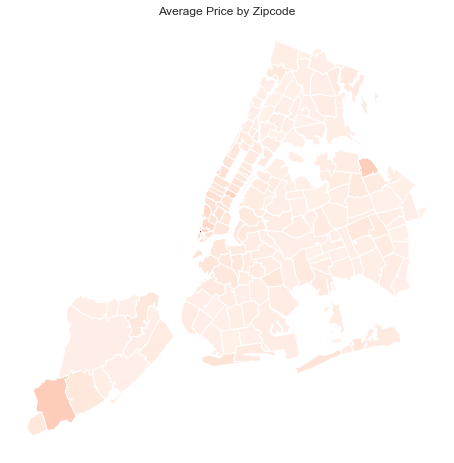

In [21]:
fig, ax = plt.subplots(figsize = (8,8))
zip_price.plot(column='avg price', cmap='Reds', alpha=1, ax=ax)
plt.title('Average Price by Zipcode')
plt.axis('off')
plt.savefig("Images/Average Price by Zipcode.png")
plt.show()

### Price of each Listings

In [22]:
size = geo["price"].values

data3 = [
    go.Scattermapbox(
        lat=geo["latitude"],
        lon=geo["longitude"],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=size*0.003
        ),
    )
]
fig = go.Figure(data=data3, layout=layout)
#py.iplot(fig, filename='Price of AirBnb in NYC')

IFrame('https://plot.ly/~gj2297/10', width=750, height=750)

### Price Range 

#### Price Range in NYC

In [23]:
bins = list(range(0, 1050, 50))
bins.append(10000)

group_names = [f"{i}-{i+50}" for i in bins]
del group_names[-1]
del group_names[-1]
group_names.append('1000-10000')

organized_df["Price Range ($)"] = pd.cut(organized_df["price"], bins, labels=group_names)

total_airbnb = len(organized_df)
price_sum = organized_df.groupby("Price Range ($)")["id"].count()
percent = round(price_sum / total_airbnb*100, 2)
price_summary = pd.DataFrame({"Number": price_sum, "Percent(%)": percent})
price_summary = price_summary.reset_index()
#price_summary

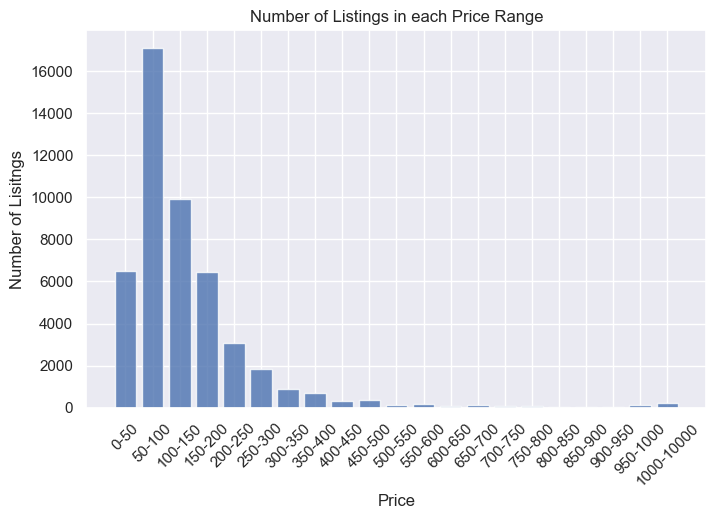

In [24]:
# bar chart: total number of airbnb in each price range
figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(group_names, price_summary["Number"], alpha = 0.8)
plt.xticks(rotation = 45)
plt.xlabel("Price")
plt.ylabel("Number of Lisitngs")
plt.title("Number of Listings in each Price Range")
plt.savefig("Images/Number of Listings in each Price Range.png")
plt.show()

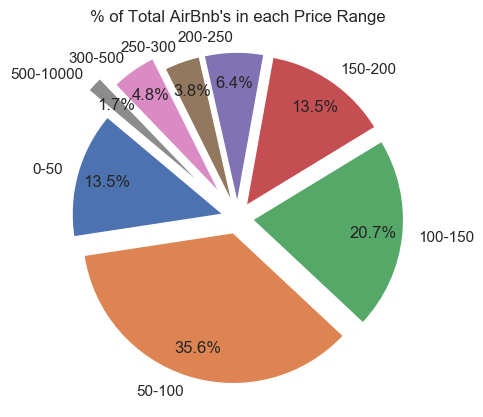

In [25]:
# pie chart: % of total  airbnb in each price range
sizes = price_summary["Number"].tolist()[0:6]
sizes.append(sum(price_summary["Number"][6:10]))
sizes.append(sum(price_summary["Number"][10:-1]))
labels = group_names[0:6]
labels.append("300-500")
labels.append("500-10000")
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.3)
#colors = ["red", "orange", "lightcoral", "lightskyblue", "green", "black", "yellow"]
figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k')
plt.pie(sizes, labels=labels, explode=explode, autopct="%1.1f%%", startangle=140, pctdistance=0.8, labeldistance=1.1)
plt.title("% of Total AirBnb's in each Price Range")
plt.savefig("Images/% of Total AirBnb's in each Price Range.png")
plt.show()

#### Price Range in each Borough

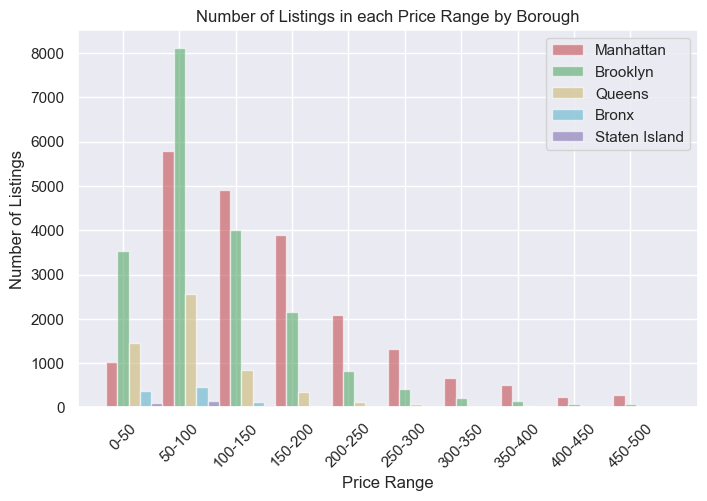

In [26]:
manhattan = organized_df.loc[organized_df["borough"]=="Manhattan"].groupby("Price Range ($)")["id"].count()[0:10]
brooklyn = organized_df.loc[organized_df["borough"]=="Brooklyn"].groupby("Price Range ($)")["id"].count()[0:10]
queens =  organized_df.loc[organized_df["borough"]=="Queens"].groupby("Price Range ($)")["id"].count()[0:10]
bronx = organized_df.loc[organized_df["borough"]=="Bronx"].groupby("Price Range ($)")["id"].count()[0:10]
staten_island = organized_df.loc[organized_df["borough"]=="Staten Island"].groupby("Price Range ($)")["id"].count()[0:10]

figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k')

barWidth = 0.2

r1 = np.arange(len(manhattan))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, manhattan, width=barWidth, color="r", alpha = 0.6, label =  "Manhattan")
plt.bar(r2, brooklyn, width=barWidth, color="g", alpha = 0.6, label =  "Brooklyn")
plt.bar(r3, queens, width=barWidth, color="y", alpha = 0.6, label =  "Queens")
plt.bar(r4, bronx, width=barWidth, color="c", alpha = 0.6, label =  "Bronx")
plt.bar(r5, staten_island, width=barWidth, color="m", alpha = 0.6, label =  "Staten Island")
plt.xticks([r + barWidth for r in range(len(manhattan))], group_names[0:10])
plt.xticks(rotation = 45)
plt.xlabel("Price Range")
plt.ylabel("Number of Listings")
plt.title("Number of Listings in each Price Range by Borough")
plt.legend()
plt.savefig("Images/Number of Listings in each Price Range by Borough.png")
plt.show()

## IV. Room Type

### geolocation by room type

In [27]:
entire_room = go.Scattermapbox(
    lat=geo.loc[geo["room_type"]=="Entire home/apt"]["latitude"].values,
    lon=geo.loc[geo["room_type"]=="Entire home/apt"]["longitude"].values,
    mode='markers',
    name="Entrie home/apt",
    marker=go.scattermapbox.Marker(
        size=1.5,
        color = "orangered"
    ),
)

private_room = go.Scattermapbox(
    lat=geo.loc[geo["room_type"]=="Private room"]["latitude"].values,
    lon=geo.loc[geo["room_type"]=="Private room"]["longitude"].values,
    mode='markers',
    name="Private room",
    marker=go.scattermapbox.Marker(
        size=1.5,
        color = "limegreen"            
    ),
)

shared_room = go.Scattermapbox(
    lat=geo.loc[geo["room_type"]=="Shared room"]["latitude"].values,
    lon=geo.loc[geo["room_type"]=="Shared room"]["longitude"].values,
    mode='markers',
    name="Shared room",
    marker=go.scattermapbox.Marker(
        size=1.5,
        color = "blue"           
    ),
)

data2 = [entire_room, private_room, shared_room]
fig = go.Figure(data=data2, layout=layout)
#py.iplot(fig, filename='AirBnb in NYC by room type')

IFrame('https://plot.ly/~gj2297/6', width=750, height=750)

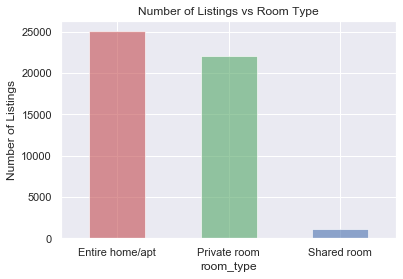

In [28]:
room_type_num = pd.DataFrame(organized_df.groupby("room_type")["id"].count())
room_type_num.plot.bar(color="rgb", alpha = 0.6)
plt.xticks(rotation = "0")
plt.ylabel("Number of Listings")
plt.title("Number of Listings vs Room Type")
plt.legend().remove()
plt.savefig("Images/Number of Listings vs Room Type.png")
plt.show()

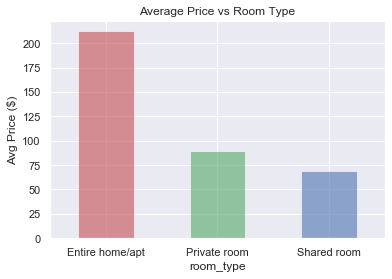

In [29]:
room_type_price = pd.DataFrame(organized_df.groupby("room_type")["price"].mean())

room_type_price.plot.bar(color = "rgb", alpha = 0.6)
plt.xticks(rotation = "0")
plt.ylabel("Avg Price ($)")
plt.legend().remove()
plt.title("Average Price vs Room Type")
plt.savefig("Images/Average Price vs Room Type.png")
plt.show()

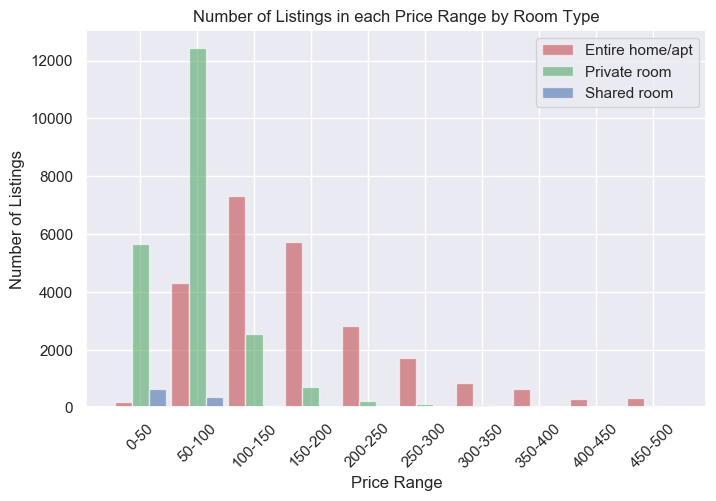

In [30]:
entire_home = organized_df.loc[organized_df["room_type"]=="Entire home/apt"].groupby("Price Range ($)")["id"].count()[0:10]
private_room = organized_df.loc[organized_df["room_type"]=="Private room"].groupby("Price Range ($)")["id"].count()[0:10]
shared_room = organized_df.loc[organized_df["room_type"]=="Shared room"].groupby("Price Range ($)")["id"].count()[0:10]
figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k')
barWidth = 0.3

r1 = np.arange(len(entire_home))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.bar(r1, entire_home, color="r", width=barWidth, alpha = 0.6, label =  "Entire home/apt")
plt.bar(r2, private_room, color="g", width=barWidth, alpha = 0.6, label =  "Private room")
plt.bar(r3, shared_room, color="b", width=barWidth, alpha = 0.6, label =  "Shared room")
plt.xticks([r + barWidth for r in range(len(entire_home))], group_names[0:10])
plt.xticks(rotation = 45)
plt.xlabel("Price Range")
plt.ylabel("Number of Listings")
plt.title("Number of Listings in each Price Range by Room Type")
plt.legend()
plt.savefig("Images/Number of Listings in each Price Range by Room Type.png")
plt.show()

In [31]:
url = "https://data.cityofnewyork.us/resource/xywu-7bv9.json"
response = requests.get(url)
response_json = response.json()
#print(json.dumps(response_json, indent=4, sort_keys=True))

population=[]
borough=[]
percent = []
for i in range(len(response_json)):
    p = response_json[i]["_2020"]
    b = response_json[i]["borough"]
    per = response_json[i]["_2020_boro_share_of_nyc_total"]
    population.append(p)
    borough.append(b)
    percent.append(per)


population_2020 = pd.DataFrame({"population": population, "borough": borough, "percent": percent})
population_2020

,population,borough,percent
0,8550971,NYC Total,100.00
1,1446788,Bronx,16.92
2,2648452,Brooklyn,30.97
3,1638281,Manhattan,19.16
4,2330295,Queens,27.25
5,487155,Staten Island,5.70


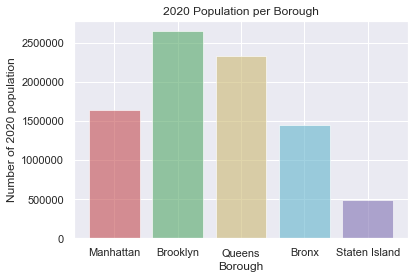

In [32]:
population_2020.iloc[1:6, 0]

Boroughs = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
population_2020 = [1638281, 2648452, 2330295, 1446788, 487155]
plt.bar(Boroughs, population_2020, color="rgycm", align="center", alpha = 0.6)
plt.title("2020 Population per Borough")
plt.xlabel("Borough")
plt.ylabel("Number of 2020 population")
plt.savefig("Images/2020 Population per Borough")
plt.show()

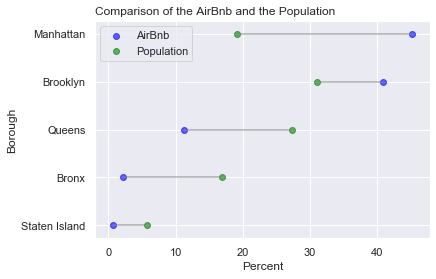

In [33]:
# percent of each borough
AirBnb = [45.1, 40.8, 11.2, 2.1, 0.7]
Population =[19.16, 30.97, 27.25, 16.92, 5.70]
df = pd.DataFrame({'group':["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"], 'AirBnb':AirBnb , 'Population':Population })

ordered_df = df.sort_values(by='AirBnb')
my_range=range(1,len(df.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['AirBnb'], xmax=ordered_df['Population'], color='grey', alpha=0.6)
plt.scatter(ordered_df['AirBnb'], my_range, color='blue', alpha=0.6, label='AirBnb')
plt.scatter(ordered_df['Population'], my_range, color='green', alpha=0.6 , label='Population')
plt.legend()

plt.yticks(my_range, ordered_df['group'])
plt.title('Comparison of the AirBnb and the Population', loc='left')
plt.xlabel('Percent')
plt.ylabel('Borough')
plt.savefig("Images/Comparison of the AirBnb and the Population")
plt.show()

## What drives price?

In [34]:
data = organized_df[["price", "host_is_superhost", "latitude", "longitude", "room_type", \
                     "accommodates", "bathrooms", "bedrooms", "beds", "bed_type", "number_of_reviews", \
                     "review_scores_rating", "review_scores_cleanliness", "review_scores_checkin", \
                     "review_scores_communication", "review_scores_location", "review_scores_value"]]
data = data.dropna()

superhost = pd.get_dummies(data["host_is_superhost"])
room_type = pd.get_dummies(data["room_type"])
bed_type = pd.get_dummies(data["bed_type"])
data = pd.concat([data, superhost, room_type, bed_type], axis=1, join_axes=[data.index])
data.drop(["host_is_superhost", "room_type", "bed_type", "f"], axis=1, inplace=True)
data = data.rename(columns={"t": "isSuperhost"})
data = data[data["price"]<=1000]
data.head()

,price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_cleanliness,...,review_scores_value,isSuperhost,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,149.0,40.64749,-73.97237,2,1.0,1.0,1.0,9,98.0,10.0,...,10.0,0,0,1,0,0,0,0,0,1
1,225.0,40.75362,-73.98377,2,1.0,0.0,1.0,44,95.0,9.0,...,9.0,0,1,0,0,0,0,0,0,1
3,89.0,40.68514,-73.95976,3,1.0,1.0,4.0,258,90.0,9.0,...,9.0,0,1,0,0,0,0,0,0,1
4,105.0,40.76260,-73.99304,2,1.0,1.0,2.0,27,89.0,9.0,...,9.0,0,1,0,0,0,0,0,0,1
6,200.0,40.74767,-73.97500,2,1.0,1.0,1.0,71,88.0,9.0,...,9.0,0,1,0,0,0,0,0,0,1


In [35]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled)
listNames = list(data.columns.values)
data_norm.columns = listNames
data_norm.head()

,price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_cleanliness,...,review_scores_value,isSuperhost,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
0,0.149,0.342394,0.507696,0.066667,0.133333,0.090909,0.045455,0.014778,0.9750,1.000,...,1.000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.225,0.604178,0.486059,0.066667,0.133333,0.000000,0.045455,0.072250,0.9375,0.875,...,0.875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.089,0.435263,0.531630,0.133333,0.133333,0.090909,0.181818,0.423645,0.8750,0.875,...,0.875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.105,0.626329,0.468465,0.066667,0.133333,0.090909,0.090909,0.044335,0.8625,0.875,...,0.875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.200,0.589502,0.502705,0.066667,0.133333,0.090909,0.045455,0.116585,0.8500,0.875,...,0.875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
corr = data_norm.corr()
corr

,price,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_cleanliness,...,review_scores_value,isSuperhost,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
price,1.000000,0.053751,-0.262100,0.549019,0.268682,0.410837,0.422620,-0.035934,0.066051,0.077411,...,-0.018581,0.008249,0.490101,-0.460313,-0.105211,-0.018714,-0.010373,-0.029959,-0.024324,0.044255
latitude,0.053751,1.000000,0.086940,-0.050802,-0.061155,-0.086380,-0.058895,-0.007389,-0.013218,-0.015318,...,-0.026310,-0.018838,-0.019155,0.017942,0.004274,0.012620,-0.002584,0.004140,0.009003,-0.012753
longitude,-0.262100,0.086940,1.000000,-0.008302,0.012513,0.031934,0.012584,0.046907,-0.021683,0.014936,...,0.013290,0.060124,-0.181477,0.174035,0.026886,0.011710,-0.002495,0.007210,-0.006837,-0.005057
accommodates,0.549019,-0.050802,-0.008302,1.000000,0.312171,0.652444,0.758148,0.078593,-0.008386,0.030627,...,-0.033229,0.048600,0.481585,-0.454804,-0.095004,-0.015274,-0.011851,-0.034947,-0.030589,0.049920
bathrooms,0.268682,-0.061155,0.012513,0.312171,1.000000,0.383423,0.337513,-0.021854,-0.014660,-0.021159,...,-0.015281,-0.002920,0.002421,-0.013965,0.038824,-0.007028,-0.010552,-0.012224,-0.018310,0.024456
bedrooms,0.410837,-0.086380,0.031934,0.652444,0.383423,1.000000,0.663973,0.022242,0.009725,0.017453,...,0.003480,0.042700,0.192487,-0.182378,-0.035973,-0.010687,-0.006709,-0.023699,-0.034864,0.041865
beds,0.422620,-0.058895,0.012584,0.758148,0.337513,0.663973,1.000000,0.056336,-0.021914,0.012222,...,-0.033991,0.043627,0.324512,-0.329527,0.013584,-0.019935,-0.017289,-0.029212,-0.028838,0.048910
number_of_reviews,-0.035934,-0.007389,0.046907,0.078593,-0.021854,0.022242,0.056336,1.000000,0.027992,0.085632,...,0.047581,0.302511,-0.012079,0.019214,-0.023887,-0.001380,0.006227,0.033105,0.031544,-0.040309
review_scores_rating,0.066051,-0.013218,-0.021683,-0.008386,-0.014660,0.009725,-0.021914,0.027992,1.000000,0.706343,...,0.748019,0.193286,0.065429,-0.053417,-0.041086,-0.011468,0.001840,-0.010161,0.006561,0.007145
review_scores_cleanliness,0.077411,-0.015318,0.014936,0.030627,-0.021159,0.017453,0.012222,0.085632,0.706343,1.000000,...,0.597733,0.221819,0.074842,-0.065777,-0.031262,-0.001540,0.007504,-0.011590,0.013307,-0.001916


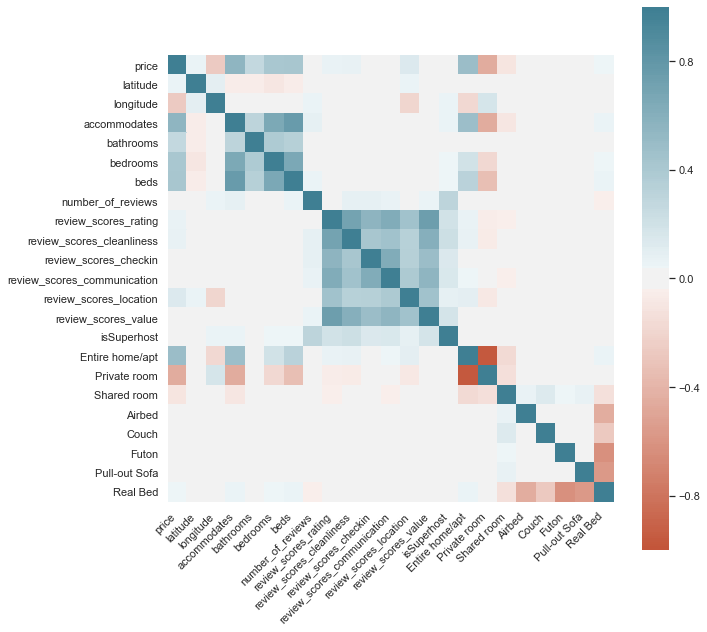

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig("Images/Correlation.png")
plt.show()

## Price vs Accommodates

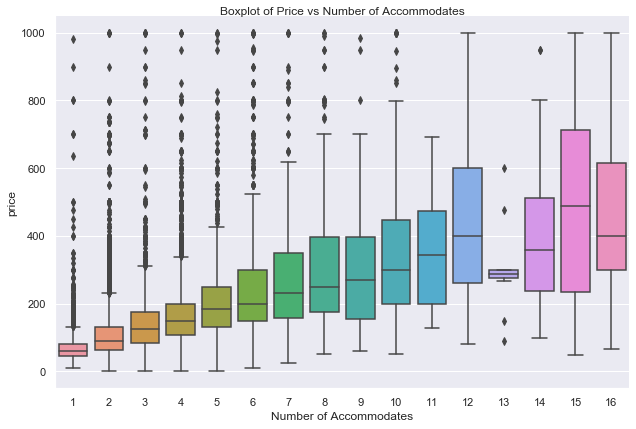

In [38]:
sns.catplot(kind='box', y="price", x="accommodates", data=data, height=6, aspect=1.5, legend_out=False)
plt.xlabel("Number of Accommodates")
plt.title("Boxplot of Price vs Number of Accommodates", pad = 1)
plt.savefig("Images/Boxplot of Price vs Number of Accommodates.png")
plt.show()

## Price vs Beds

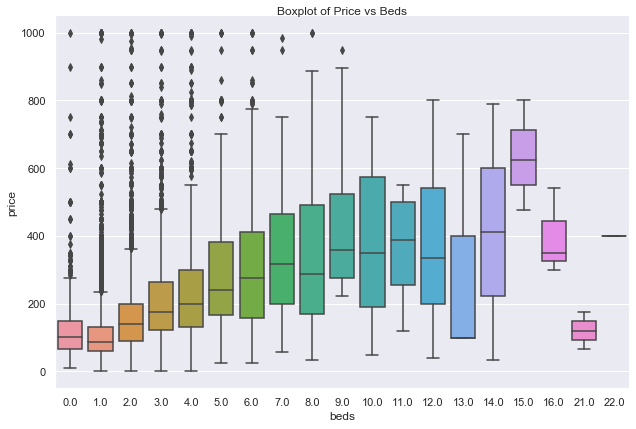

In [39]:
sns.catplot(kind='box', y="price", x="beds", data=data, height=6, aspect=1.5, legend_out=False)
plt.title("Boxplot of Price vs Beds", pad = 1)
plt.savefig("Images/Boxplot of Price vs Beds.png")
plt.show()

## Price vs Bedrooms

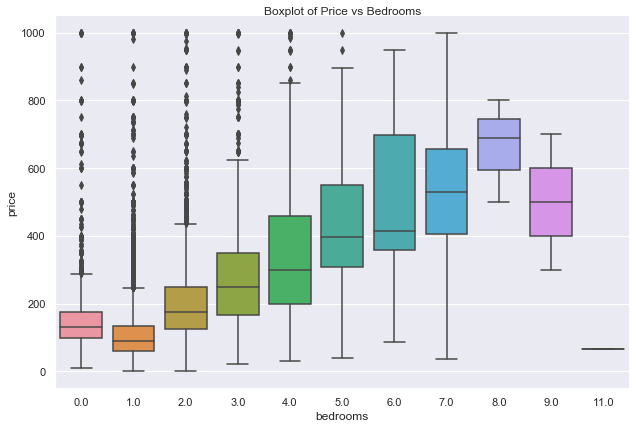

In [40]:
sns.catplot(kind='box', y="price", x="bedrooms", data=data, height=6, aspect=1.5, legend_out=False)
plt.title("Boxplot of Price vs Bedrooms", pad = 1)
plt.savefig("Images/Boxplot of Price vs Bedrooms.png")
plt.show()

## Price vs Bathrooms

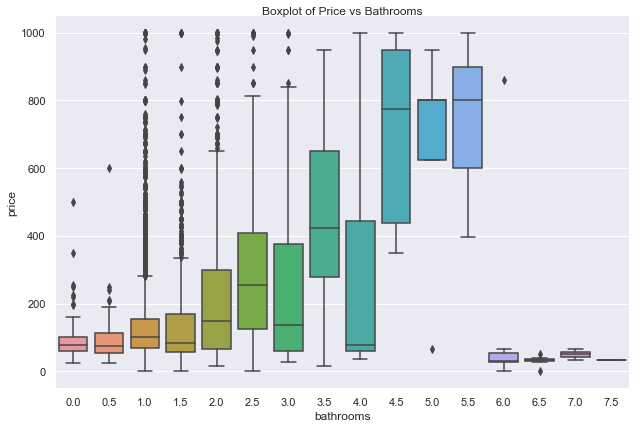

In [41]:
sns.catplot(kind='box', y="price", x="bathrooms", data=data, height=6, aspect=1.5, legend_out=False)
plt.title("Boxplot of Price vs Bathrooms", pad = 1)
plt.savefig("Images/Boxplot of Price vs Bathrooms.png")
plt.show()

## Price vs Review Scores Rating

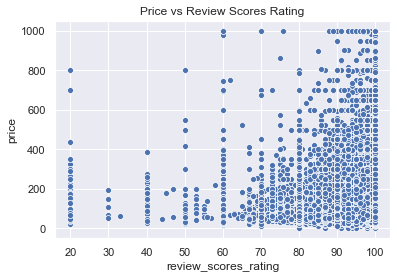

In [42]:
sns.scatterplot(y="price", x="review_scores_rating", data = data)
plt.title("Price vs Review Scores Rating")
plt.savefig("Images/Price vs Review Scores Rating")
plt.show()